In [1]:
import acquire
import pandas as pd
from string import digits
import explore
import requests
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd

import re
import unicodedata
import nltk

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = acquire.get_github_geology_results(cached=True)

In [2]:
###################################### Clean Data Function ###############################

def basic_clean(string):
    '''
    Converts text in to ascii to remove special characters, then converts back in to utf-8
    '''
    string = (unicodedata.normalize('NFKD', string.lower())
            .encode('ascii', 'ignore') # ascii to reduce noise
            .decode('utf-8', 'ignore') # decode using utf-8
           )
    string = re.sub(r"[^a-z0-9\s]", '', string)
     # Remove numbers from text
    string = re.sub(r'\d+', '', string)
    return string
    

def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string


def remove_stopwords(string):
    extra_words=('accessing',
     'according',
     'account',
     'accuracy',
     'accurate',
     'acknowledgement',
     'acquired',
     'across',
     'activate',
     'addition',
     'additional',
     'adhere',
     'adheres',
     'aim',
     'al',
     'along',
     'also',
     'alternative',
     'anacona',
     'anaconda',
     'analyse',
     'analysed',
     'analysis',
     'andor',
     'answer',
     'appearance',
     'application',
     'assetids',
     'associated',
     'assumption',
     'attempt',
     'author',
     'automated',
     'automatic',
     'available',
     'based',
     'behavior',
     'behaviour',
     'benson',
     'better',
     'bias',
     'biased',
     'billie',
     'birthdeath',
     'bug',
     'calculated',
     'cannot',
     'caper',
     'capture',
     'carried',
     'cause',
     'cc',
     'cc ',
     'cd',
     'check',
     'cite',
     'citing',
     'clone',
     'closer',
     'cloud',
     'cloudquickplotcloudheadergetcamera',
     'code',
     'coma',
     'commented',
     'common',
     'compared',
     'complete',
     'completeness',
     'conda',
     'consistently',
     'console',
     'contributing',
     'conventionally',
     'cool',
     'copytxt',
     'corescannerhypercloud',
     'corescannerhypercloud ',
     'corrected',
     'correction',
     'could',
     'count',
     'cpu',
     'create',
     'created',
     'currently',
     'daniel',
     'data',
     'database',
     'dataimporterr',
     'datasets',
     'default',
     'define',
     'derivative',
     'design',
     'desired',
     'detailed',
     'dev',
     'developingmd',
     'different',
     'difficult',
     'dimensionality',
     'directory',
     'disable',
     'disables',
     'display',
     'dissertation',
     'diversitydependent',
     'documentation',
     'doe',
     'download',
     'downloading',
     'dtilesets',
     'due',
     'earth',
     'easily',
     'efficiently',
     'eg',
     'empirical',
     'end',
     'enforce',
     'entierty',
     'enviroment',
     'environment',
     'equilibrium',
     'error',
     'estimate',
     'estimation',
     'et',
     'even',
     'example',
     'except',
     'explosion',
     'exponentially',
     'exponentiallydiversifying',
     'extant',
     'extend',
     'factor',
     'fast',
     'feature',
     'feel',
     'file',
     'find',
     'fine',
     'fix',
     'following',
     'format',
     'foundation',
     'free',
     'function',
     'functionssavesetsr',
     'functionsuniformsamplingr',
     'gdal',
     'general',
     'generate',
     'generating',
     'geological',
     'geology',
     'get',
     'getting',
     'git',
     'github',
     'gnu',
     'google',
     'ground',
     'ha',
     'happy',
     'hardcoded',
     'high',
     'highresolution',
     'history',
     'hope',
     'httplocalhost',
     'httpsbetaswissgeolch',
     'httpsgithubcomswissgeolngmgit',
     'httpshylitereadthedocsioenlatestindexhtml',
     'httpsopengameartorgcontenttemplateorangetexturepack',
     'httpswwwgnuorglicenses',
     'hylitergb',
     'hyperclouds',
     'id',
     'idea',
     'image',
     'imagine',
     'implemented',
     'implied',
     'import',
     'inaccurate',
     'included',
     'includes',
     'including',
     'indicate',
     'inferred',
     'information',
     'initialscreenspaceerror',
     'inspector',
     'install',
     'installation',
     'installed',
     'integrated',
     'integration',
     'introduces',
     'inverse',
     'io',
     'ioloadtestdatahypercloudplycloudquickplotcloudheadergetcamera',
     'ioloadtestdataimagehdrimagequickplothylitergb',
     'ioloadtestdatalibrarycsvlibquickplot',
     'issue',
     'json',
     'jupyter',
     'key',
     'keyboard',
     'keyboardlayouteditor',
     'know',
     'laboratory',
     'launch',
     'launching',
     'layout',
     'learning',
     'least',
     'length',
     'level',
     'lib',
     'libquickplot',
     'library',
     'licencemd',
     'license',
     'limit',
     'lineagecombining',
     'list',
     'local',
     'localhost',
     'localhost ',
     'long',
     'longheld',
     'lorenz',
     'machine',
     'made',
     'maintainerpackage',
     'make',
     'many',
     'map',
     'marineeumetazoacsv',
     'mark',
     'marker',
     'marking',
     'matplotlib',
     'maximum',
     'maximumscreenspaceerror',
     'merchantability',
     'method',
     'mind',
     'minimum',
     'modify',
     'multiscale',
     'must',
     'myr',
     'myrs',
     'navigate',
     'navigation',
     'need',
     'new',
     'next',
     'ngm',
     'nolimit',
     'nolimitfalse',
     'norequestrendermode',
     'note',
     'notebook',
     'npm',
     'number',
     'numpy',
     'occurrence',
     'one',
     'open',
     'opencv',
     'opening',
     'openpit',
     'opensource',
     'operation',
     'optimization',
     'optional',
     'order',
     'originatorclose',
     'ouput',
     'outdoor',
     'ownterrainfalse',
     'oxford',
     'package',
     'parameter',
     'partially',
     'particular',
     'past',
     'pattern',
     'pde',
     'pdes',
     'perform',
     'performed',
     'phytools',
     'pip',
     'placed',
     'please',
     'point',
     'pointcloud',
     'possible',
     'potential',
     'preform',
     'preprocessing',
     'prerequisitev',
     'prerequisitewindowv',
     'present',
     'prevented',
     'problem',
     'processing',
     'produce',
     'produced',
     'program',
     'project',
     'prompt',
     'properly',
     'provide',
     'provided',
     'proxy',
     'public',
     'publically',
     'published',
     'pull',
     'purpose',
     'python',
     'quality',
     'question',
     'r',
     'rather',
     'raw',
     'readme',
     'received',
     'recent',
     'record',
     'rectangle',
     'redistribute',
     'reduction',
     'refer',
     'reference',
     'referred',
     'reforester',
     'regime',
     'reinterpretation',
     'report',
     'repository',
     'request',
     'requires',
     'research',
     'resource',
     'respectively',
     'restrict',
     'restriction',
     'result',
     'results',
     'reults',
     'review',
     'rigorous',
     'roger',
     'run',
     'running',
     'said',
     'sample',
     'sampled',
     'sampling',
     'scan',
     'scene',
     'script',
     'seamless',
     'second',
     'section',
     'see',
     'separated',
     'server',
     'set',
     'setuppy',
     'setuptools',
     'significant',
     'significantly',
     'similarly',
     'simple',
     'slight',
     'software',
     'solved',
     'source',
     'specie',
     'specific',
     'specifically',
     'sphere',
     'start',
     'started',
     'stay',
     'step',
     'still',
     'study',
     'style',
     'submit',
     'sufficiently',
     'suggests',
     'supervised',
     'sure',
     'swiss',
     'swissgeol',
     'swissrectangle',
     'swissrectanglefalse',
     'swisstopo',
     'take',
     'technique',
     'technology',
     'template',
     'templatelogistic',
     'templatenotebooks',
     'term',
     'terminal',
     'test',
     'testdatahypercloudply',
     'testdataimagehdr',
     'testdatalibrarycsv',
     'testing',
     'texture',
     'theoretically',
     'thereby',
     'thiele',
     'thing',
     'thompson',
     'though',
     'tidyverse',
     'time',
     'timeheterogeneous',
     'tool',
     'touchdirectly',
     'true',
     'try',
     'trying',
     'tuned',
     'type',
     'typing',
     'ubiquity',
     'understanding',
     'unfortunately',
     'unsupervised',
     'unzip',
     'url',
     'us',
     'use',
     'used',
     'userhylite'
     'userhylite ',
     'userhyliterequired',
     'using',
     'value',
     'variety',
     'vast',
     'version',
     'viewed',
     'viewer',
     'visual',
     'wa',
     'want',
     'way',
     'welcome',
     'welcomed',
     'widget',
     'window',
     'word',
     'work',
     'project',
     'workflow')

    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    #print(f"Lenght of stopword list before:{len(stopword_list)}")
    stopword_list = set(stopword_list).union(set(extra_words))
    #print(f"Lenght of stopword list after:{len(stopword_list)}")
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    return string_without_stopwords

    
def clean_data(df):
    '''
    This function takes in a dataframe of text, cleans, tokenizes, lemmatizes, and removes stopwords
    from that text, appending each step in the process to the dataframe.  It also appends a list of 
    words from each article as well as the total lenght.  
    '''    

    # Formatts repo contents to make them easier to read
    df['text_cleaned'] = df.content.apply(basic_clean)
    df['text_tokenized'] = df.text_cleaned.apply(tokenize)
    df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
    df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)
    # Add column with list of words
    words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
    df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
    # Adds column with lenght of word list
    df['doc_length'] = [len(wordlist) for wordlist in df.words]
    df[['language','text_filtered','words','doc_length']]
    # removing unpopular languages 
    language_list = ['JavaScript', 'R', 'Jupyter Notebook']
    df = df[df.language.isin(language_list)]
    return df


In [3]:
df = clean_data(df)
df.head(5)

,language,content,date,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,Jupyter Notebook,hylite\nhylite is an open-source python packag...,2020-11-27 17:31:07.762,hylite\nhylite is an opensource python package...,hylite\nhylite is an opensource python package...,hylite hylite is an opensource python package ...,hylite hylite imagery hyperspectral sensor fus...,"[hylite, hylite, imagery, hyperspectral, senso...",55
2,R,"Reforester\nReforester, an R program that:\n\n...",2020-11-27 17:31:08.926,reforester\nreforester an r program that\n\nus...,reforester\nreforester an r program that\n\nus...,reforester reforester an r program that us a l...,logistic model simulated phylogenetic tree her...,"[logistic, model, simulated, phylogenetic, tre...",322
3,JavaScript,Swissgeol NGM\nA Geology 3D viewer\nSwissgeol ...,2020-11-27 17:31:09.532,swissgeol ngm\na geology d viewer\nswissgeol i...,swissgeol ngm\na geology d viewer\nswissgeol i...,swissgeol ngm a geology d viewer swissgeol is ...,cesiumjs adapt developing lava cesium ion cesi...,"[cesiumjs, adapt, developing, lava, cesium, io...",11
6,Jupyter Notebook,Automatic Rock Core Sample Marker\n\nAs we kno...,2020-11-27 17:31:11.414,automatic rock core sample marker\n\nas we kno...,automatic rock core sample marker\n\nas we kno...,automatic rock core sample marker a we know th...,rock core ore ore core,"[rock, core, ore, ore, core]",5
8,Jupyter Notebook,hylite\nhylite is an open-source python packag...,2020-11-27 17:31:12.886,hylite\nhylite is an opensource python package...,hylite\nhylite is an opensource python package...,hylite hylite is an opensource python package ...,hylite hylite imagery hyperspectral sensor fus...,"[hylite, hylite, imagery, hyperspectral, senso...",55


In [4]:
# create a list of words for each language category and remove single letter words
jupyter_words, js_words, r_words = explore.create_lang_word_list(df)
# get the count of words by category
jupyter_freq, js_freq, r_freq = explore.get_count_word_freq(jupyter_words, js_words, r_words)

In [5]:
jupyter_freq.head(100)

hylite                     4176
spectral                   1160
wavelength                  696
ioload                      696
mapping                     696
ore                         688
hyperspectral               464
imagery                     464
rock                        460
core                        456
mine                        232
sensor                      232
userhylite                  232
polymorphism                232
spectrum                    232
imagequickplothylitergb     232
visualisation               232
fusing                      232
radiometrically             232
touchdirectly               232
visualised                  232
visualising                 232
corescannerhypercloud       232
multisensor                 232
angle                       232
classification              232
measurement                 232
dtype: int64

In [6]:
js_freq.tail(20)

cesium        458
lava          458
rendering     229
ion           229
developing    229
terrain       229
cesiumion     229
adapt         229
cesiumjs      229
dtype: int64

In [7]:
r_freq.tail(20)

originator                 232
systematic                 232
edit                       232
inherently                 232
master                     232
straightforward            232
copy                       232
comment                    232
repurposed                 232
university                 232
vary                       232
three                      232
various                    232
releasev                   232
heterogeneous              232
preserved                  232
terrestrialtetrapodscsv    232
copied                     232
containing                 232
either                     232
dtype: int64

In [8]:

# ioload                      696
# touchdirectly               232
# imagequickplothylitergb     232
# visualising                 232
# radiometrically             232
# userhylite                  232
# spectrum                    232
# mine                        232
# visualisation               232
# angle                       232
# corescannerhypercloud       232
# visualised                  232
# multisensor                 232
# throughout              232
# gradient                232
# creator                 232
# close                   232
# integral                232
# intended                232
# degree                  232
# mostnotably             232
# computes                232
# tested                  232
# fitness                 232
# yet                     232
# mainuniformsamplingr    232
# survived                232
# either                  232
# cambrian                232
# straightforward         232
# systematic              232
# introduced              232
# whether                 232

In [9]:


def remove_stopwords(text):
    extra_words=('project','workflow','I')
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    stopword_list = set(stopword_list).union(set(extra_words))
    
    # Split words in string.
    words = text.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [10]:
text =(" I a hat this project but and i have no workflow purple unicorn apple fan open square")
remove_stopwords(text)

'hat purple unicorn apple fan open square'

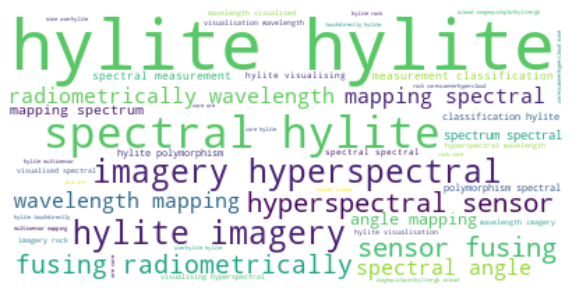

In [11]:
# Wordcloud jupyter_notebook
plt.figure(figsize=(10,10))
text = jupyter_words
wc = WordCloud(background_color="white",
               max_words=2000, max_font_size=224,
               random_state=42)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

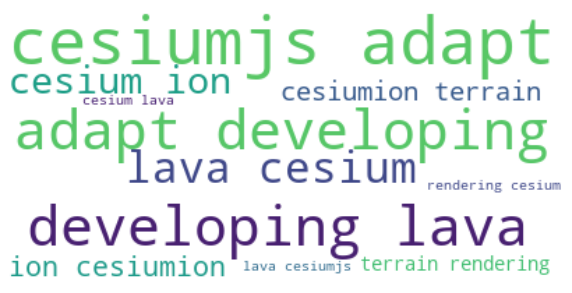

In [12]:
# Wordcloud js
plt.figure(figsize=(10,10))
text = js_words
wc = WordCloud(background_color="white",
               max_words=2000, max_font_size=224,
               random_state=42)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

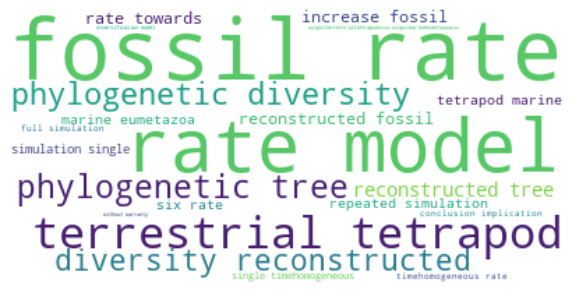

In [13]:
# Wordcloud R
plt.figure(figsize=(10,10))
text = r_words
wc = WordCloud(background_color="white",
               max_words=2000, max_font_size=224,
               random_state=42)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()